In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
df23 = pd.read_excel('../data/data2023.xlsx')

In [4]:
df20 = pd.read_excel('../data/data2020.xlsx')
df21 = pd.read_excel('../data/data2021_first.xlsx')

Try pred 21 using 20 year data

Try no adjusment

In [10]:
df21['YEAR'] = 2021
df20['YEAR'] = 2020

In [11]:
df20=df20[['price','area', 'floor','total_floor', 'year_built','city_x','Latitude', 'Longitude', 'YEAR']].rename(columns={'city_x':'region'})

In [12]:
df21=df21[['price', 'area', 'floor', 'total_floor', 'flat.city' , 'Latitude',
       'Longitude', 'YEAR', 'year_built']].rename(columns={'flat.city':'region'})

In [13]:
df_join = pd.concat([df20, df21])

In [89]:
from scipy import spatial
tree20 = spatial.KDTree(df20[['Latitude','Longitude']].to_numpy())
tree21 = spatial.KDTree(df21[['Latitude','Longitude']].to_numpy())

def get_neigbours(row, n_neighbors = 5):
    if row['YEAR'] == 2020:
        tree = tree20
        df_send = df20
    elif row['YEAR'] == 2021:
        tree = tree21
        df_send = df21
        
    distances, indexes = tree.query([row['Latitude'], row['Longitude']], k=n_neighbors+10000)
 
    indexes = [index for distance, index in zip(distances, indexes) if distance!=0]

    return df_send.iloc[indexes[0]]

def is_best_view(row, n_neighbors=5):
    neibgours = get_neigbours(row, n_neighbors)
    # try:
    return int(neibgours['total_floor'].max())< int(row['floor'])
    # except:
        # return False

In [90]:
df_join['best_view'] = df_join.apply(lambda row: is_best_view(row, 1), axis=1)

<AxesSubplot: xlabel='best_view', ylabel='price'>

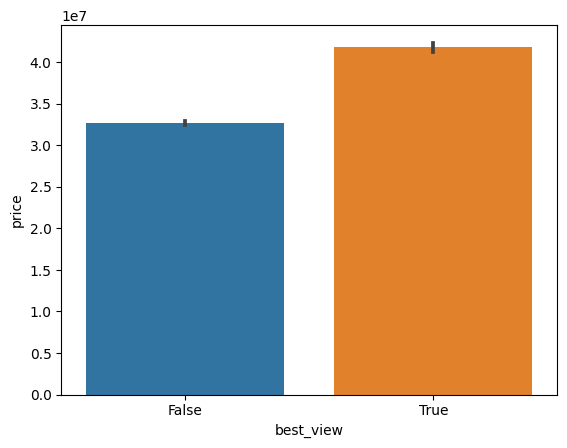

In [92]:
sns.barplot(x=df_join['best_view'], y=df_join['price'])

In [41]:
from geopy.distance import geodesic

In [95]:

def calculate_distance(row):
    neigbour = get_neigbours(row,n_neighbors=1)
    # coord1 и coord2 - кортежи с широтой и долготой в формате (широта, долгота)
    distance = geodesic((row['Latitude'], row['Longitude']), (neigbour['Latitude'],neigbour['Longitude'])).meters
    return distance


In [96]:
df_join['dist_to_neigbour'] = df_join.apply(lambda x: calculate_distance(x),axis=1)


In [97]:
sns.histplot(df_join['dist_to_neigbour'])

: 

In [1]:
df_join['dist_to_neigbour'].value_counts()

NameError: name 'df_join' is not defined